In [24]:
!git clone https://git.cse.iitb.ac.in/ssood/posters-dataset.git

fatal: destination path 'posters-dataset' already exists and is not an empty directory.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
year = 1989
others_genres_flag = False
csv_file = 'movies_metadata.csv'

In [0]:
genres = [
    "Adventure",
    "Fantasy",
    "Animation",
    "Drama",
    "Horror",
    "Action",
    "Comedy",
    "History",
    "Western",
    "Thriller",
    "Crime",
    "Documentary",
    "Science Fiction",
    "Mystery",
    "Music",
    "Romance",
    "Family",
    "War",
    "Foreign",
    "TV Movie",
]
others_label = 'Others'

In [0]:
df = pd.read_csv(csv_file, dtype={'imdb_id': 'str', 'genres': 'str', 'release_date': 'str', 'original_language': 'str'}, 
                     usecols=['imdb_id', 'genres', 'release_date', 'original_language'])
df = df[df.original_language=='en']

# filter out all rows having no IMDB id
# filter out all rows having no genre information
df = df[(~df['imdb_id'].isna()) & (df['genres'] != '[]') & (~df['release_date'].isna())]

# filer row with release_date > year threshold and take 'imdb_id', 'genres' columns
df = df[df['release_date'].str[:4].astype('int16') > year][['imdb_id', 'genres']]

In [0]:
'''
df.genres = df.apply(lambda row: {
    {i['name'] if i['name'] in genres else others_label for i in eval(row.genres)} if others_genres_flag
    else {i['name'] for i in eval(row.genres) if i['name'] in genres}
}, axis=1)
'''
if others_genres_flag:
    df.genres = df.apply(lambda row: {i['name'] if i['name'] in genres else others_label for i in eval(row.genres)}, axis=1)
else:
    df.genres = df.apply(lambda row: {i['name'] for i in eval(row.genres) if i['name'] in genres}, axis=1)


In [30]:
df.head()

,imdb_id,genres
15648,tt0090665,"{Comedy, Drama}"
15649,tt0100822,"{Comedy, Romance, Drama}"
15650,tt0099776,"{History, Drama}"
15651,tt0100670,"{Comedy, Science Fiction}"
15652,tt0099121,{Documentary}


In [31]:
df.genres

15648                                  {Comedy, Drama}
15649                         {Comedy, Romance, Drama}
15650                                 {History, Drama}
15651                        {Comedy, Science Fiction}
15652                                    {Documentary}
                             ...                      
45251                                          {Drama}
45252                                 {Romance, Drama}
45253                        {Crime, Thriller, Action}
45254                                  {Comedy, Drama}
45255    {Fantasy, Action, Science Fiction, Adventure}
Name: genres, Length: 19855, dtype: object

In [0]:
genre_labels = genres.copy()
if others_genres_flag:
    genre_labels.append(others_label)
mlb = MultiLabelBinarizer(classes=genre_labels)
genres_encoded = mlb.fit_transform(df.genres)


In [0]:
genre_count = np.sum(genres_encoded, axis=0)

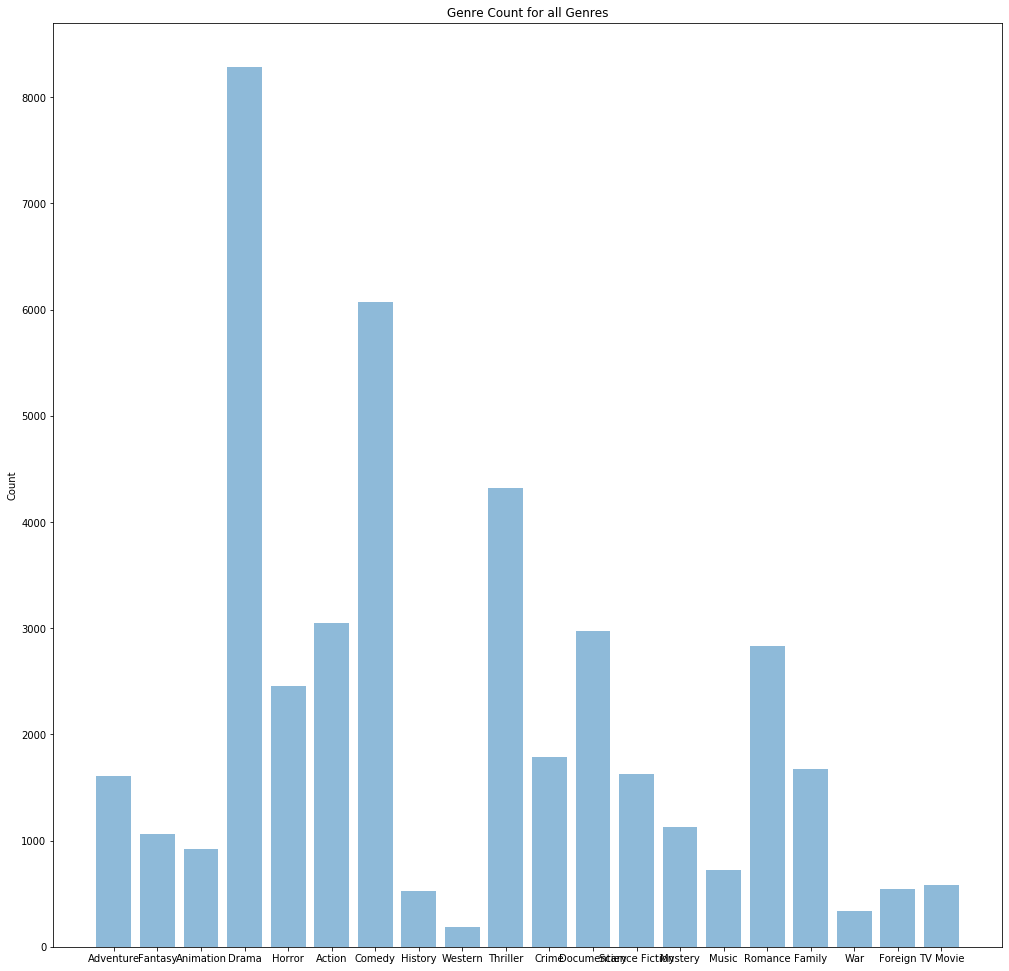

In [34]:
pos = np.arange(len(mlb.classes_))
plt.bar(pos, genre_count, align='center', alpha=0.5)
plt.xticks(pos, mlb.classes_)
plt.ylabel('Count')
plt.title('Genre Count for all Genres')
plt.rcParams["figure.figsize"]=21,21

plt.show()

In [0]:
genre_df = pd.DataFrame(data=genres_encoded, columns=genre_labels)

In [36]:
genre_df.cov()

,Adventure,Fantasy,Animation,Drama,Horror,Action,Comedy,History,Western,Thriller,Crime,Documentary,Science Fiction,Mystery,Music,Romance,Family,War,Foreign,TV Movie
Adventure,0.074305,0.013196,0.009551,-0.013845,-0.006389,0.031948,-0.003102,0.000427,0.001199,-0.000103,-0.002176,-0.010330,0.011042,-0.001575,-0.002122,-0.006695,0.016873,0.000550,-0.001250,-0.000397
Fantasy,0.013196,0.050719,0.005827,-0.007459,0.001822,0.005563,0.001449,-0.001369,-0.000155,-0.004100,-0.003858,-0.007815,0.008243,-0.000126,-0.000480,-0.000290,0.012215,-0.000652,-0.001060,0.000751
Animation,0.009551,0.005827,0.044191,-0.015815,-0.004482,0.000483,0.002205,-0.001076,-0.000187,-0.008969,-0.003761,-0.006025,0.002844,-0.001628,0.000034,-0.004998,0.024208,-0.000631,-0.000963,-0.000800
Drama,-0.013845,-0.007459,-0.015815,0.243186,-0.031568,-0.019131,-0.028410,0.006924,0.000329,0.003061,0.014879,-0.055586,-0.017443,0.004824,-0.002271,0.034854,-0.010830,0.004794,0.003968,0.002968
Horror,-0.006389,0.001822,-0.004482,-0.031568,0.108553,-0.003734,-0.019489,-0.002980,-0.000367,0.033596,-0.005895,-0.017577,0.010630,0.008921,-0.003983,-0.015054,-0.009716,-0.001839,-0.001619,-0.001806
Action,0.031948,0.005563,0.000483,-0.019131,-0.003734,0.130093,-0.014450,-0.000295,0.002322,0.037033,0.017567,-0.021685,0.021630,-0.002143,-0.004811,-0.014472,-0.003511,0.002544,-0.000872,-0.001670
Comedy,-0.003102,0.001449,0.002205,-0.028410,-0.019489,-0.014450,0.212245,-0.006789,-0.001333,-0.048145,-0.009233,-0.039580,-0.010136,-0.011741,-0.000845,0.030440,0.013576,-0.004100,-0.001897,-0.001777
History,0.000427,-0.001369,-0.001076,0.006924,-0.002980,-0.000295,-0.006789,0.025792,0.000354,-0.003495,-0.001021,0.002736,-0.002125,-0.001154,-0.000355,-0.001160,-0.001523,0.005396,0.000032,0.000334
Western,0.001199,-0.000155,-0.000187,0.000329,-0.000367,0.002322,-0.001333,0.000354,0.009379,-0.000901,-0.000398,-0.001215,-0.000274,-0.000337,-0.000242,-0.000243,-0.000545,0.000092,-0.000208,0.000479
Thriller,-0.000103,-0.004100,-0.008969,0.003061,0.033596,0.037033,-0.048145,-0.003495,-0.000901,0.170189,0.031783,-0.031525,0.010805,0.026265,-0.007271,-0.017825,-0.016933,-0.001101,-0.001353,-0.002576
